# After comparing 8 models using VIF and r squared values i concluded tha ml1 is the better model among all.

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [123]:
#read the data
df = pd.read_csv("ToyotaCorolla.csv",encoding='ANSI')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [124]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
df1 = df[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


<AxesSubplot:>

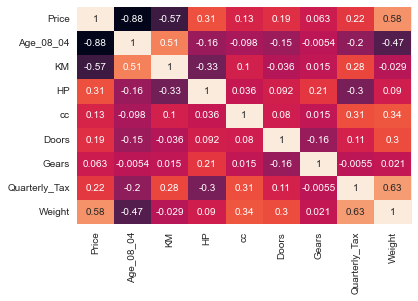

In [126]:
sns.heatmap(df1.corr(),annot=True,cbar=False)

In [127]:
df1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


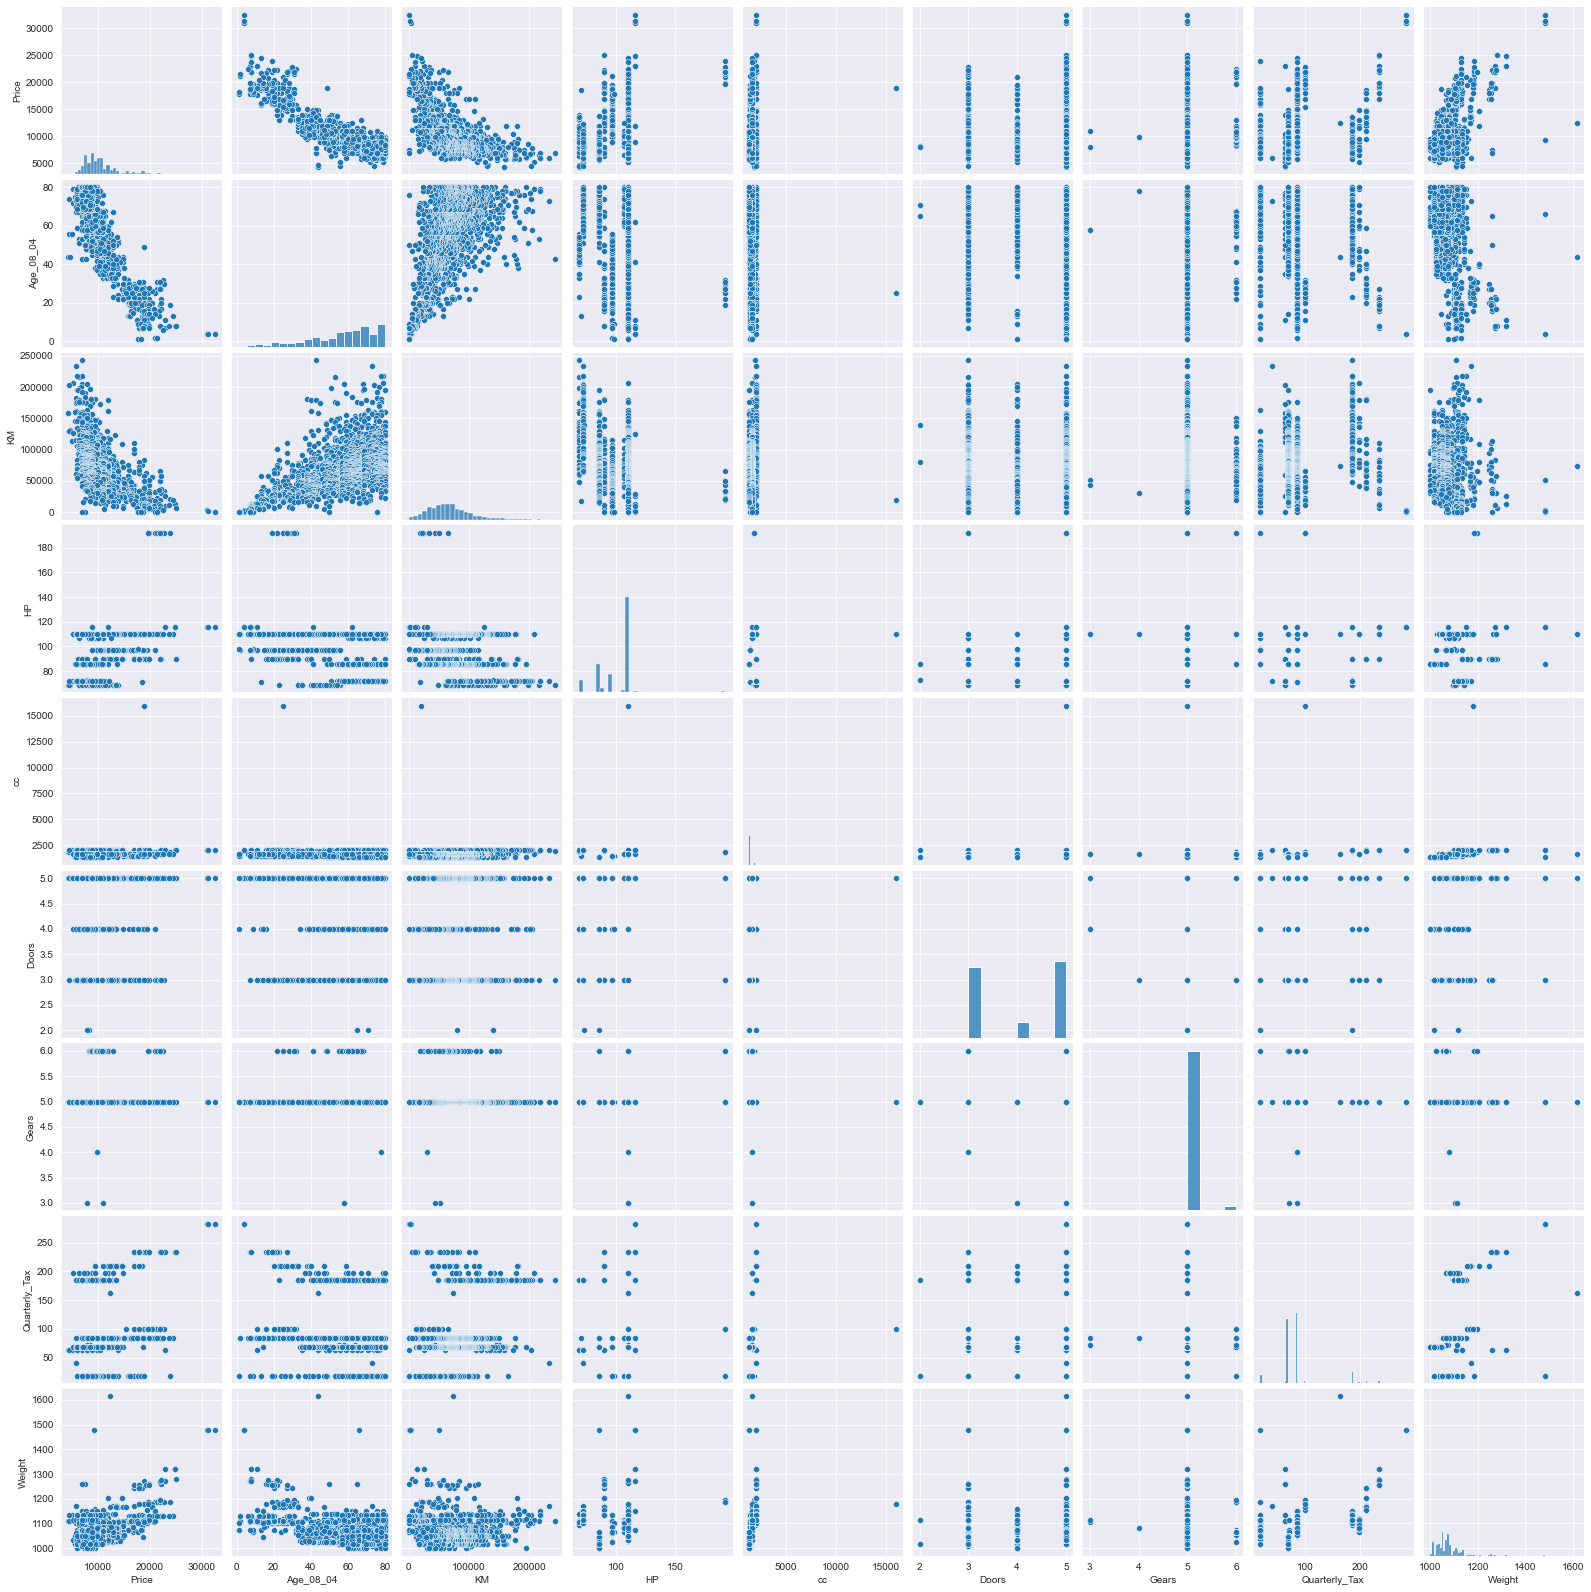

In [128]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)

In [148]:
ml1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit()
ml1.rsquared

0.8637627463428192

In [155]:
rsq_Price = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit().rsquared  

In [154]:
vif_Price = 1/(1-rsq_Price)
vif_Price

7.340136219395173

In [130]:
print(ml1.tvalues,'\n',ml1.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [131]:
ml1.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [132]:
ml1_predictions = ml1.predict(df1)
ml1_predictions

0       16812.580505
1       16272.355186
2       16800.732460
3       16426.496731
4       16222.419010
            ...     
1431     8793.758297
1432     8291.338421
1433     8454.298007
1434     8578.038121
1435    10402.438333
Length: 1436, dtype: float64

In [133]:
df1['ml1_Price']=ml1_predictions

C:\Users\sneha\AppData\Local\Temp\ipykernel_10984\3065591870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ml1_Price']=ml1_predictions


In [134]:
df1['residuals']=ml1.resid
df1

C:\Users\sneha\AppData\Local\Temp\ipykernel_10984\31675822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['residuals']=ml1.resid


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,ml1_Price,residuals
0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,-3312.580505
1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,-2522.355186
2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,-2850.732460
3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,-1476.496731
4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,-2472.419010
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025,8793.758297,-1293.758297
1432,10845,72,19000,86,1300,3,5,69,1015,8291.338421,2553.661579
1433,8500,71,17016,86,1300,3,5,69,1015,8454.298007,45.701993
1434,7250,70,16916,86,1300,3,5,69,1015,8578.038121,-1328.038121


# High Influence Points

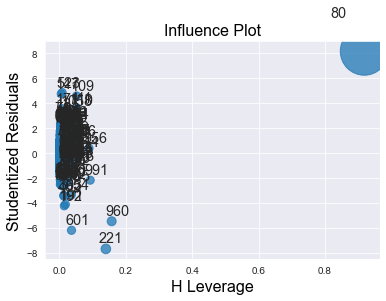

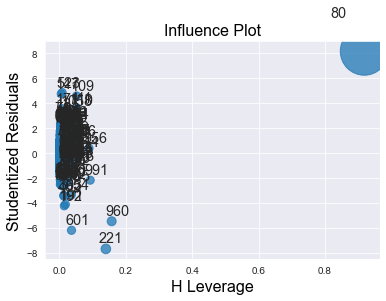

In [135]:
import statsmodels.api as sm
sm.graphics.influence_plot(ml1)
#From the influence plot we conclude that index 601,960,221 and 80 are highly influential.

In [136]:
#df1_new=df1.drop(df1.index[[601,960,221,80]],axis=0)

# Test for Normality of Residuals (Q-Q Plot) and Residual Analysis

In [137]:
sample = np.random.normal(40,30,1000)
sample

array([-1.63991570e+01,  6.69488309e+01,  8.99739924e+01,  5.25433627e+01,
        7.15929536e+01,  4.59436527e+01,  6.54655744e+01, -4.40384087e+00,
        4.72485259e+01, -2.57063196e+01,  8.07453471e+00,  2.84128626e+01,
        5.87962532e+01,  3.49078844e+01,  8.68173162e+00,  3.87524280e+01,
        5.34996752e+01,  4.25484098e+01, -5.92583700e+00,  7.49806067e+01,
        8.89300597e+01,  3.84191219e+01,  6.18806037e+01,  2.92182927e+01,
        4.44303910e+01,  2.98789317e+01,  5.70038123e+01,  4.04245094e+01,
        5.58732599e+01,  6.52391220e+01,  2.36947870e+01,  3.42002027e+01,
        4.24727679e+01,  4.09591628e+01,  7.54880836e+01,  4.22829713e+01,
        1.77455943e+01,  3.63376279e+01,  2.87513414e+01,  4.32131890e-01,
        8.88488240e+01,  6.07076234e+01,  6.12724166e+01,  5.12072449e+01,
        1.88090402e+01,  5.54646658e+01,  1.88016248e+01,  6.49344976e+01,
        2.64782135e+01,  7.36197463e+01,  4.49824732e+01,  6.24355604e+01,
        6.97328696e+01,  

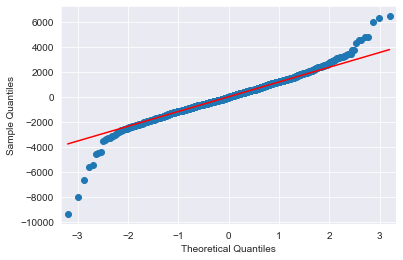

In [138]:
import statsmodels.api as sm
qqplot = sm.qqplot(df1.residuals, line = 'q')
#This qq plot shows that the residuals are almost normal

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residuals', ylabel='Density'>

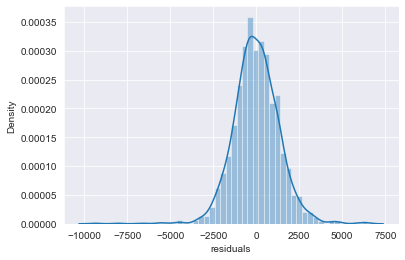

In [139]:
sns.distplot(df1.residuals)

In [140]:
df1.residuals.mean()

4.352101886548974e-09

# Residual Vs Regression

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


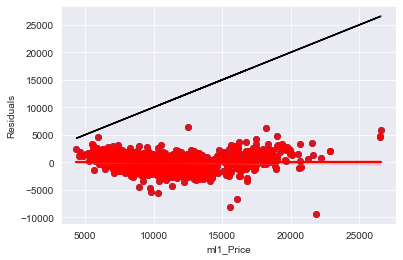

In [141]:
plt.scatter(x=df1['ml1_Price'],y=df1['residuals'])
plt.plot(df1['ml1_Price'],ml1_predictions,color='black')
sns.regplot(df1.ml1_Price,df1.residuals,color = 'red')
plt.xlabel('ml1_Price')
plt.ylabel('Residuals')
plt.show()

# Residual Plot for Homoscedasticity

Text(0, 0.5, 'residuals')

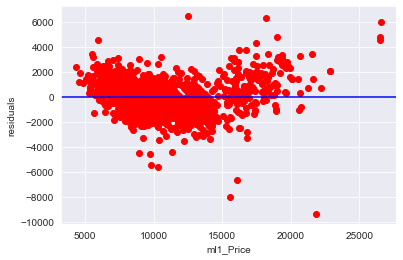

In [143]:
plt.scatter(df1.ml1_Price,df1.residuals,c="r"),plt.axhline(y=0,color='blue');
plt.xlabel("ml1_Price");
plt.ylabel("residuals")
#This plot shows that the residuals and ml_Price have almost"same variance"

# preparing model considering all the variables preparing model considering all the variables

In [159]:
ml2 = smf.ols('Age_08_04~Price+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit()
ml2.rsquared 

0.7891065240655659

In [161]:
rsq_Age = smf.ols('Age_08_04~Price+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit().rsquared
vif_Age = 1/(1-rsq_Age) 
vif_Age

4.741730371549739

In [162]:
ml3 = smf.ols('KM~Age_08_04+Price+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit()
ml3.rsquared 

0.523140838875114

In [163]:
rsq_KM = smf.ols('KM~Age_08_04+Price+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit().rsquared
vif_KM = 1/(1-rsq_KM)
vif_KM

2.0970552345918065

In [164]:
ml4 = smf.ols('HP~KM+Age_08_04+Price+cc+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit()
ml4.rsquared

0.35279754991563606

In [165]:
rsq_HP =smf.ols('HP~KM+Age_08_04+Price+cc+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit().rsquared
vif_HP = 1/(1-rsq_HP)
vif_HP

1.5451115796450527

In [166]:
ml5 = smf.ols('cc~HP+KM+Age_08_04+Price+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit()
ml5.rsquared

0.14190178143647303

In [167]:
rsq_cc = smf.ols('cc~HP+KM+Age_08_04+Price+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit().rsquared
vif_cc = 1/(1-rsq_cc)
vif_cc

1.1653677613665476

In [168]:
ml6 = smf.ols('cc~HP+KM+Age_08_04+Price+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit()
ml6.rsquared

0.14190178143647303

In [169]:
rsq_Doors=smf.ols('Doors~cc+HP+KM+Age_08_04+Price+Gears+Quarterly_Tax+Weight',data=df1).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)
vif_Doors

1.1565765306116824

In [171]:
ml7 = smf.ols('Gears~cc+HP+KM+Age_08_04+Price+Doors+Quarterly_Tax+Weight',data=df1).fit()
ml7.rsquared

0.09561742308187293

In [172]:
rsq_Gears=smf.ols('Gears~cc+HP+KM+Age_08_04+Price+Doors+Quarterly_Tax+Weight',data=df1).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)
vif_Gears

1.1057267416713281

In [175]:
ml8 = smf.ols('Quarterly_Tax~Weight+Gears+cc+HP+KM+Age_08_04+Price+Doors',data=df1).fit()
ml8.rsquared

0.5701051954062046

In [176]:
rsq_Tax = smf.ols('Quarterly_Tax~Weight+Gears+cc+HP+KM+Age_08_04+Price+Doors',data=df1).fit().rsquared
vif_Tax = 1/(1-rsq_Tax)
vif_Tax

2.326150465914314